# AIA Malaysia Funds Analysis

@author : 钟智强

> This application is designed to retrieve and analyze the most up-to-date fund details, enabling comprehensive comparisons for informed decision-making.

1. Download The Dataset from AIA Website

In [112]:
# Import Necessary Packages
try:
    import os
    import time
    import platform
    import pandas as pd
    import seaborn as sns
    import matplotlib.pyplot as plt
    from selenium import webdriver
    from selenium.webdriver.common.by import By
    from selenium.webdriver.common.keys import Keys
    from selenium.webdriver.chrome.service import Service
    from selenium.webdriver.common.action_chains import ActionChains
    from selenium.webdriver.chrome.options import Options
    from webdriver_manager.chrome import ChromeDriverManager
except ImportError as e:
    display(f"Failed to import necessary packages: {e}")
else:
    display("All packages imported successfully")

'All packages imported successfully'

In [113]:
# Base Url Declaration

_AIA_FUND_ = "https://www.aia.com.my/en/our-products/investment-linked-funds.html"

In [114]:
global driver

if not os.path.isfile("data/Funds_List.csv"):
    if platform.system() != "Darwin":
        chrome_options = Options()
        chrome_options.add_argument("--headless")  # Run Chrome in headless mode

        # Initialize WebDriver with ChromeDriverManager
        # Download from https://chromedriver.storage.googleapis.com/index.html?path=114.0.5735.90/
        # or
        # https://commondatastorage.googleapis.com/chromium-browser-snapshots/index.html?prefix=Mac_Arm/1280672/
        service = Service("config/chromedriver")
        # Uncomment this line to enable chrome
        # driver = webdriver.Chrome(
        #     service=service, options=chrome_options
        # )
        driver = None # Comment tis line if using chrome driver
    else:
        # Initialize WebDriver for Safari
        driver = webdriver.Safari()

    driver.get(_AIA_FUND_)

    display(driver)

    download_button = driver.find_element(
        "xpath",
        '//button[@type="submit" and contains(@class, "cmp-x3__button") and .//span[contains(text(), "Export list to CSV file")]]',
    )
    download_button.click()

    driver.quit()
else:
    pass

2. Load and Explore the Data
> First, load the CSV file into a pandas DataFrame and explore the data. This allows us to get an overview and perform initial filtering.

In [115]:
_AIA_FUND_LIST_ = "data/Funds_List.csv"

# Load the CSV file
df = pd.read_csv(_AIA_FUND_LIST_)

# Display the first few rows of the DataFrame
display(df.head())


,Fund Name,Entity,Asset Allocation,Market,Shariah/Non-Sariah,Risk Level,Nav Price,Movement,Valuation Date
0,A-Dana Strategic Dynamic,APTB,Balanced,Local & Foreign,Shariah,Moderate,1.16069,-0.00901,04-Sep-2024
1,AIA Balanced Fund,AIA,Balanced,Local,Non-Shariah,Moderate,4.76559,-0.02300,04-Sep-2024
2,AIA Dana Progresif*,AIA,Balanced,Local,Shariah,Moderate,3.19374,-0.01854,04-Sep-2024
3,AIA Elite Conservative Fund,AIA,Balanced,Foreign,Non-Shariah,Moderate,1.05588,-0.00731,04-Sep-2024
4,AIA Global Balanced Fund,AIA,Balanced,Foreign,Non-Shariah,Moderate,1.05947,-0.01055,04-Sep-2024


3. Filter and Identify the Best Funds
> We can filter the data based on various criteria, such as the risk level, asset allocation, or performance (e.g., NAV price, movement). For illustration, let's assume we want to find the top 5 funds based on the NAV Price or Movement.

In [116]:
# Convert 'Nav Price' and 'Movement' to numeric, if they are not already
df["Nav Price"] = pd.to_numeric(df["Nav Price"], errors="coerce")
df["Movement"] = pd.to_numeric(df["Movement"], errors="coerce")

# Sort by NAV Price or Movement to find the best-performing funds
top_funds_by_nav = df.sort_values(by="Nav Price", ascending=False).head(5)
top_funds_by_movement = df.sort_values(by="Movement", ascending=False).head(5)

display("Top Funds by NAV Price:")
display(top_funds_by_nav)

display("Top Funds by Movement:")
display(top_funds_by_movement)

'Top Funds by NAV Price:'

,Fund Name,Entity,Asset Allocation,Market,Shariah/Non-Sariah,Risk Level,Nav Price,Movement,Valuation Date
19,AIA Medium Cap Fund,AIA,Equity,Local,Non-Shariah,High,7.67636,-0.07367,04-Sep-2024
9,AIA Aggressive Fund,AIA,Equity,Local,Non-Shariah,High,7.20588,-0.04717,04-Sep-2024
16,AIA Equity Plus Fund,AIA,Equity,Local,Non-Shariah,High,5.19382,-0.03078,04-Sep-2024
1,AIA Balanced Fund,AIA,Balanced,Local,Non-Shariah,Moderate,4.76559,-0.02300,04-Sep-2024
13,AIA Dana Dinamik*,AIA,Equity,Local,Shariah,High,4.53247,-0.03444,04-Sep-2024


'Top Funds by Movement:'

,Fund Name,Entity,Asset Allocation,Market,Shariah/Non-Sariah,Risk Level,Nav Price,Movement,Valuation Date
30,AIA Global Bond Fund 4,AIA,Fixed Income,Foreign,Non-Shariah,Low,0.82695,0.01428,19-Oct-2022
28,AIA Global Bond Fund 2,AIA,Fixed Income,Foreign,Non-Shariah,Low,0.88540,0.00533,21-Jul-2022
29,AIA Global Bond Fund 3,AIA,Fixed Income,Foreign,Non-Shariah,Low,0.84943,0.00210,30-Aug-2022
26,AIA Global Bond Fund,AIA,Fixed Income,Foreign,Non-Shariah,Low,0.91828,0.00012,17-May-2022
37,A-Dana Income,AIA PUBLIC,Fixed Income,Local,Shariah,Low,0.93573,0.00011,04-Sep-2024


4. Visualize the Data

-  4a. Bar Chart for NAV Price and Movement

/var/folders/mx/1h4f22ds1dv_b29k9bwj6w4c0000gn/T/ipykernel_99494/3423402454.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  nav_plot = sns.barplot(


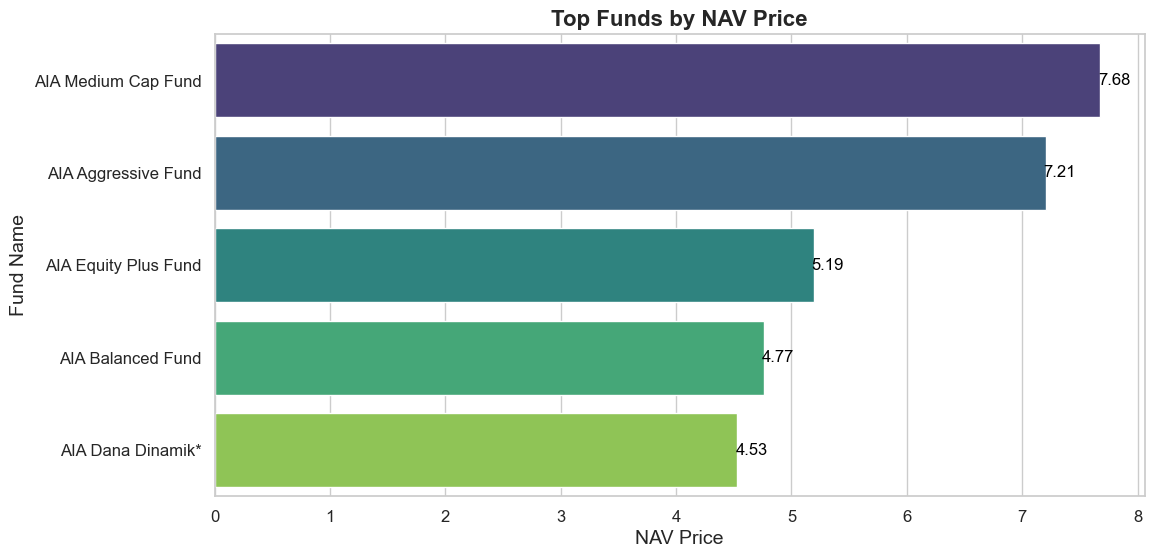

/var/folders/mx/1h4f22ds1dv_b29k9bwj6w4c0000gn/T/ipykernel_99494/3423402454.py:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  movement_plot = sns.barplot(


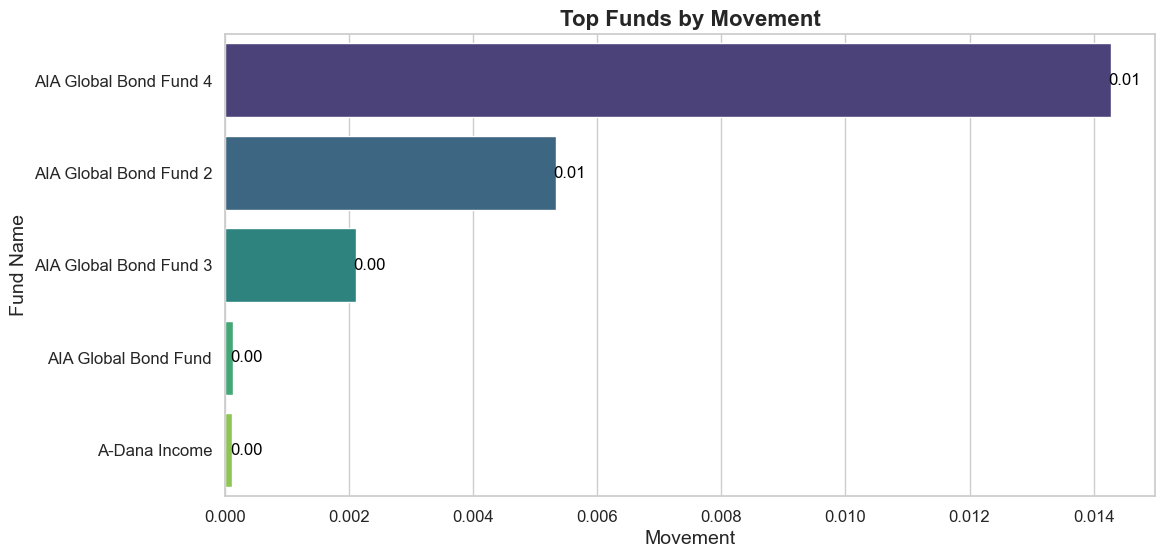

In [117]:
# Set up the plotting style
sns.set(style="whitegrid")

# Create a bar plot for NAV Price
plt.figure(figsize=(12, 6))
nav_plot = sns.barplot(
    x="Nav Price", y="Fund Name", data=top_funds_by_nav, palette="viridis"
)
plt.title("Top Funds by NAV Price", fontsize=16, fontweight="bold")
plt.xlabel("NAV Price", fontsize=14)
plt.ylabel("Fund Name", fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Add data labels
for p in nav_plot.patches:
    nav_plot.annotate(
        format(p.get_width(), ".2f"),
        (p.get_width(), p.get_y() + p.get_height() / 2),
        ha="center",
        va="center",
        xytext=(10, 0),
        textcoords="offset points",
        fontsize=12,
        color="black",
    )

plt.show()

# Create a bar plot for Movement
plt.figure(figsize=(12, 6))
movement_plot = sns.barplot(
    x="Movement", y="Fund Name", data=top_funds_by_movement, palette="viridis"
)
plt.title("Top Funds by Movement", fontsize=16, fontweight="bold")
plt.xlabel("Movement", fontsize=14)
plt.ylabel("Fund Name", fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Add data labels
for p in movement_plot.patches:
    movement_plot.annotate(
        format(p.get_width(), ".2f"),
        (p.get_width(), p.get_y() + p.get_height() / 2),
        ha="center",
        va="center",
        xytext=(10, 0),
        textcoords="offset points",
        fontsize=12,
        color="black",
    )

plt.show()

- 4b. Scatter Plot to Compare NAV Price and Movement

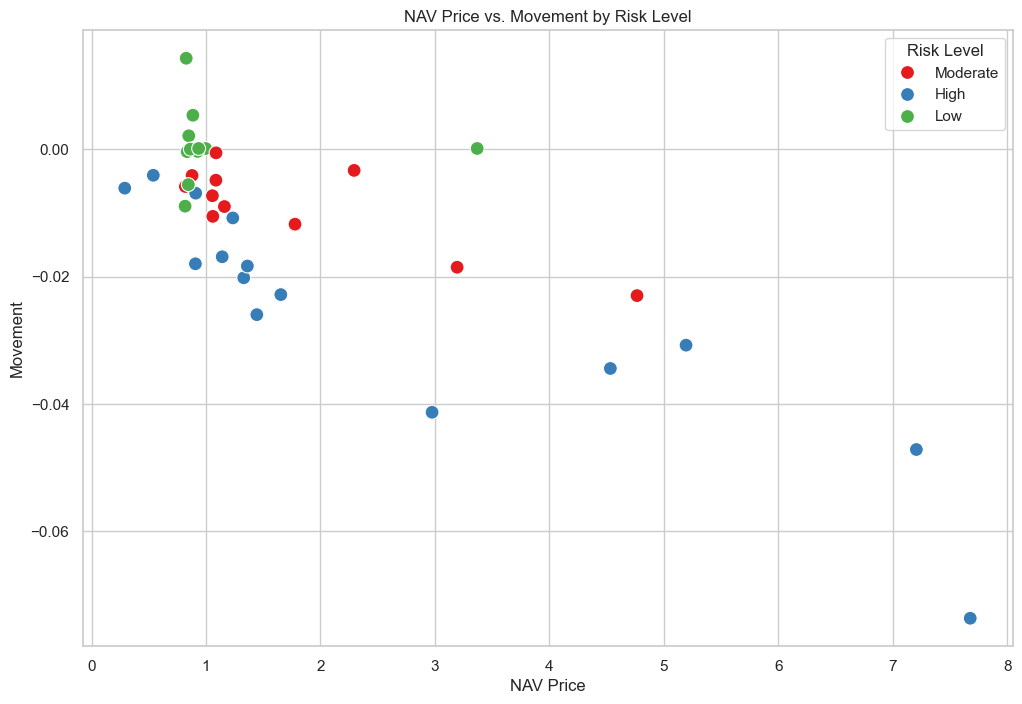

In [118]:
plt.figure(figsize=(12, 8))
sns.scatterplot(
    data=df, x="Nav Price", y="Movement", hue="Risk Level", palette="Set1", s=100
)
plt.title("NAV Price vs. Movement by Risk Level")
plt.xlabel("NAV Price")
plt.ylabel("Movement")
plt.legend(title="Risk Level")
plt.show()

5. Additional Filtering and Comparison
> We might want to filter funds based on asset allocation, market, or Shariah compliance. 

In [119]:
# Filter funds that are Shariah compliant
shariah_funds = df[df["Shariah/Non-Sariah"] == "Shariah"]

# Filter by Asset Allocation (e.g., 'Local')
local_funds = df[df["Asset Allocation"] == "Local"]

# Display the filtered DataFrames
display("Shariah Compliant Funds:")
display(shariah_funds)

'Shariah Compliant Funds:'

,Fund Name,Entity,Asset Allocation,Market,Shariah/Non-Sariah,Risk Level,Nav Price,Movement,Valuation Date
0,A-Dana Strategic Dynamic,APTB,Balanced,Local & Foreign,Shariah,Moderate,1.16069,-0.00901,04-Sep-2024
2,AIA Dana Progresif*,AIA,Balanced,Local,Shariah,Moderate,3.19374,-0.01854,04-Sep-2024
7,A-Dana Balanced,AIA PUBLIC,Balanced,Local,Shariah,Moderate,1.77759,-0.01178,04-Sep-2024
8,A-Dali Equity,APTB,Equity,Local,Shariah,High,0.53947,-0.00410,04-Sep-2024
13,AIA Dana Dinamik*,AIA,Equity,Local,Shariah,High,4.53247,-0.03444,04-Sep-2024
22,A-Dana Equity,APTB,Equity,Local,Shariah,High,0.91012,-0.00691,04-Sep-2024
23,A-Dana Strategic Equity,APTB,Equity,Local & Foreign,Shariah,High,1.23428,-0.01080,04-Sep-2024
24,AIA Dana Bon*,AIA,Fixed Income,Local,Shariah,Low,0.99707,0.00010,04-Sep-2024
37,A-Dana Income,AIA PUBLIC,Fixed Income,Local,Shariah,Low,0.93573,0.00011,04-Sep-2024
